In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Analysis

In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.isnull().sum().sum() == 0

True

## Data Viz

0    91500
1     8500
Name: diabetes, dtype: int64


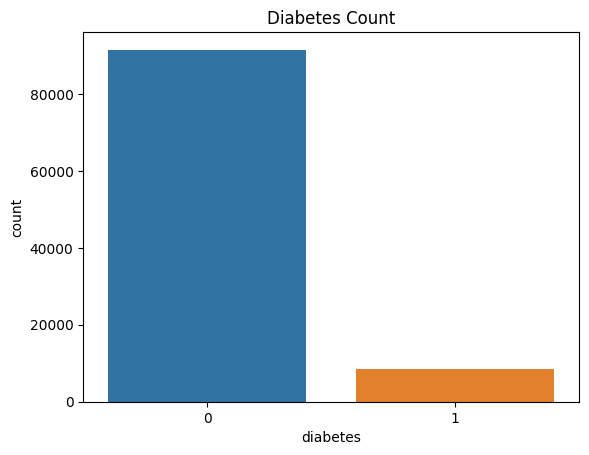

In [ ]:
print(df['diabetes'].value_counts())

plt.title('Diabetes Count')
sns.countplot(data=df, x='diabetes');

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


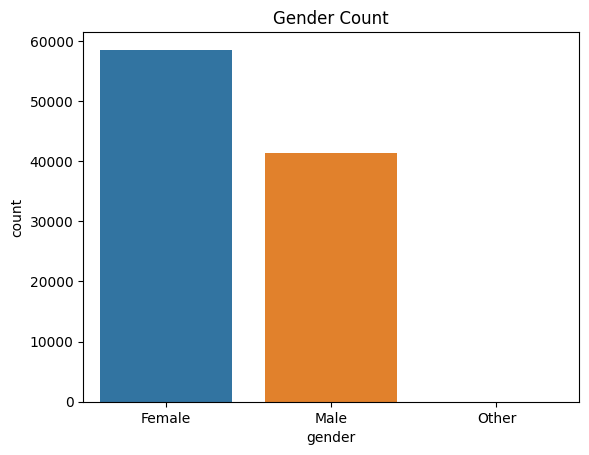

In [ ]:
print(df['gender'].value_counts())

plt.title('Gender Count')
sns.countplot(data=df, x='gender');

0    92515
1     7485
Name: hypertension, dtype: int64


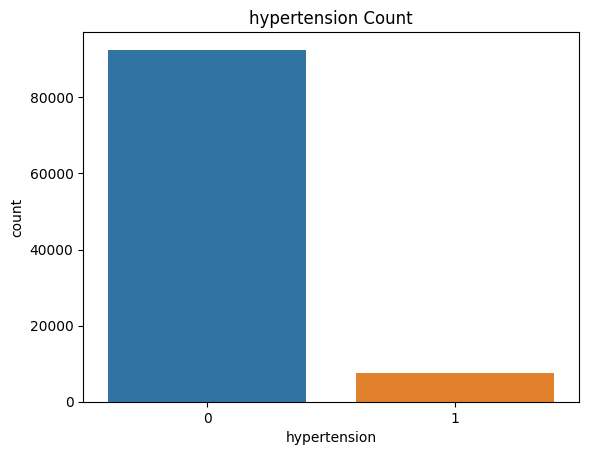

In [ ]:
print(df['hypertension'].value_counts())

plt.title('hypertension Count')
sns.countplot(data=df, x='hypertension');

correlation betwwen diabtes and hypertension : 0.19782324640804888


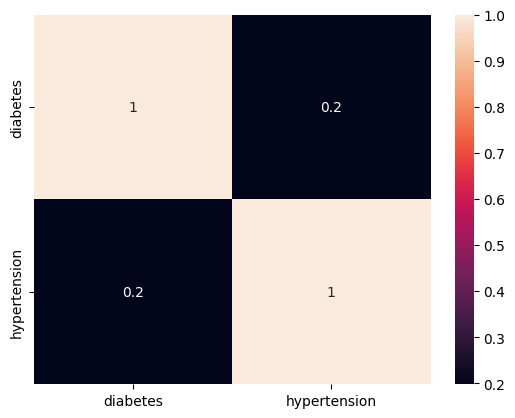

In [ ]:
correlation = df["diabetes"].corr(df["hypertension"])
print("correlation betwwen diabtes and hypertension :", correlation)

# heatmap
correlation_matrix = df[["diabetes", "hypertension"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


0    96058
1     3942
Name: heart_disease, dtype: int64


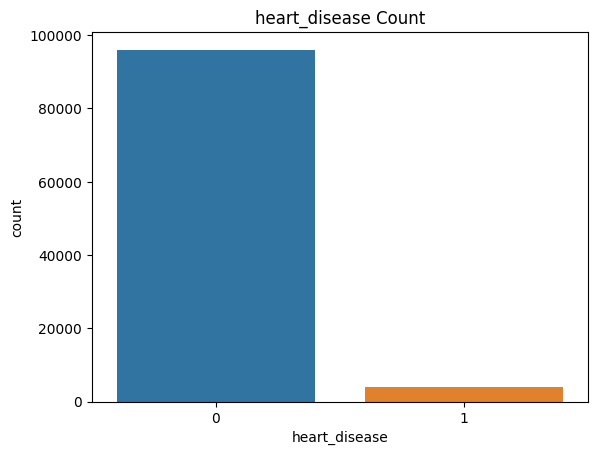

In [ ]:
print(df['heart_disease'].value_counts())

plt.title('heart_disease Count')
sns.countplot(data=df, x='heart_disease');

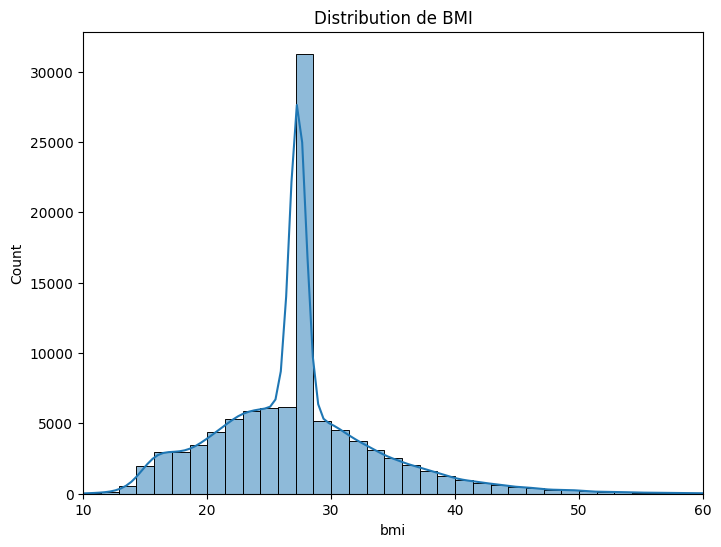

In [ ]:
# Histogramme de la variable BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=60)
plt.xlim(10, 60)
plt.title('Distribution de BMI')
plt.show()

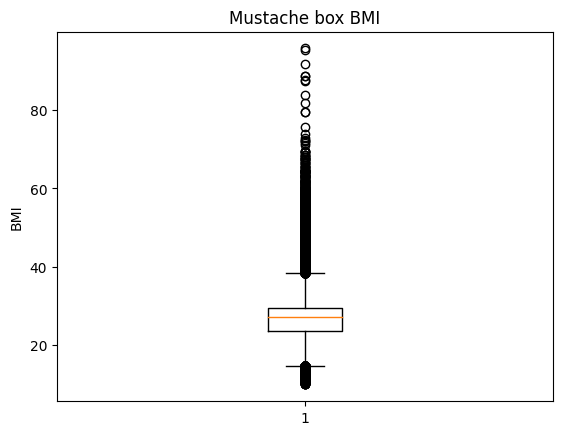

In [ ]:
plt.boxplot(df['bmi'])
plt.ylabel('BMI')
plt.title('Mustache box BMI')
plt.show()

Transformed `bmi` column to categorical using the standard value classifications.
Source: [cancer.org](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

In [ ]:
# ranges and labels for BMI value classifications, according to cancer.org
intervals = [0, 18.5, 25, 30, np.inf]
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=intervals,
                            labels=["underweight", "normal", "overweight", "obese"])

# Histogramme de la variable BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi_category'], kde=True, bins=60)
plt.xlim(10, 60)
plt.title('Distribution de BMI')
plt.show()

In [ ]:
import numpy as np

bmi_values = df['bmi']
print("Résumé statistique du BMI :")
print(f"Moyenne : {np.mean(bmi_values):.2f}")
print(f"Écart-type : {np.std(bmi_values):.2f}")
print(f"Minimum : {np.min(bmi_values):.2f}")
print(f"25e percentile : {np.percentile(bmi_values, 25):.2f}")
print(f"Médiane : {np.median(bmi_values):.2f}")
print(f"75e percentile : {np.percentile(bmi_values, 75):.2f}")
print(f"Maximum : {np.max(bmi_values):.2f}")

Résumé statistique du BMI :
Moyenne : 27.32
Écart-type : 6.64
Minimum : 10.01
25e percentile : 23.63
Médiane : 27.32
75e percentile : 29.58
Maximum : 95.69


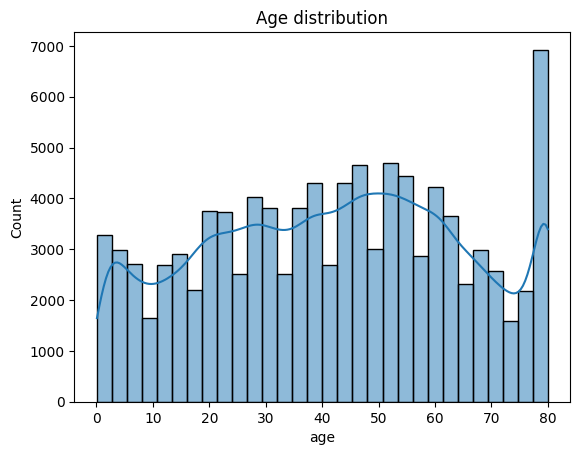

In [ ]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

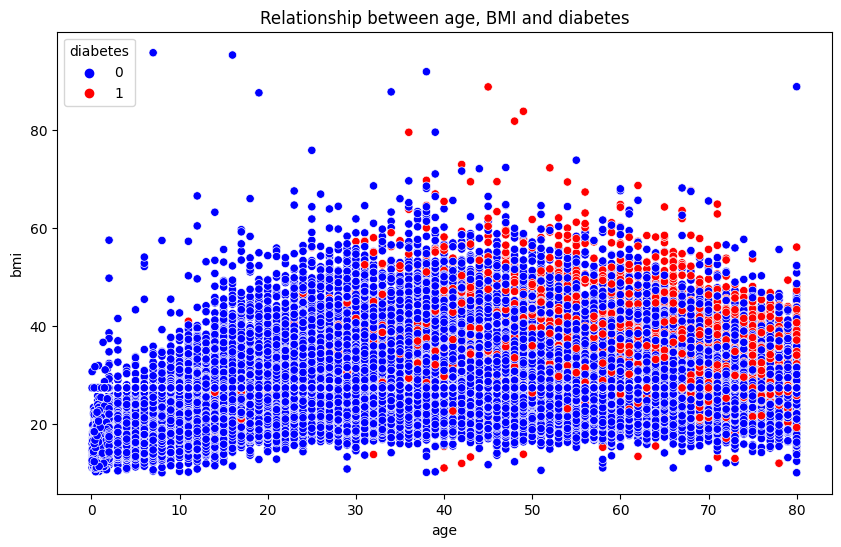

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Frequency of categories in smoking history')
plt.show()

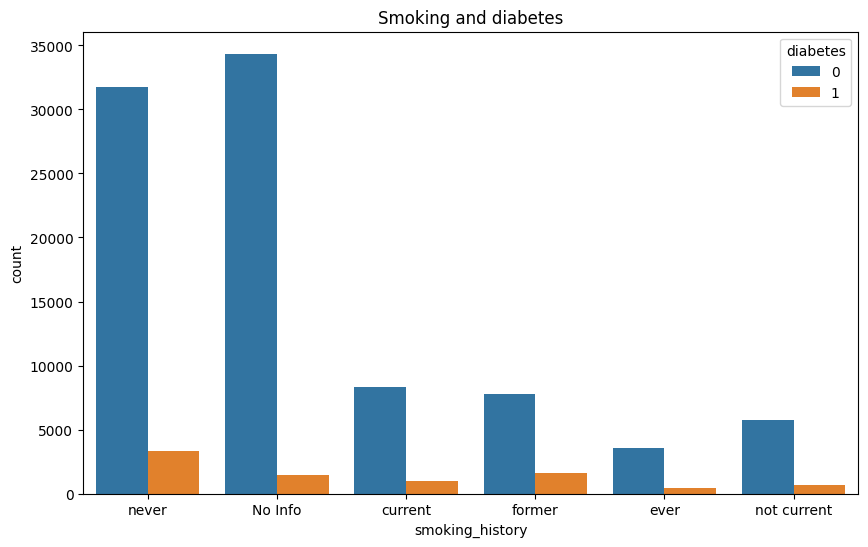

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Smoking and diabetes')
plt.show()

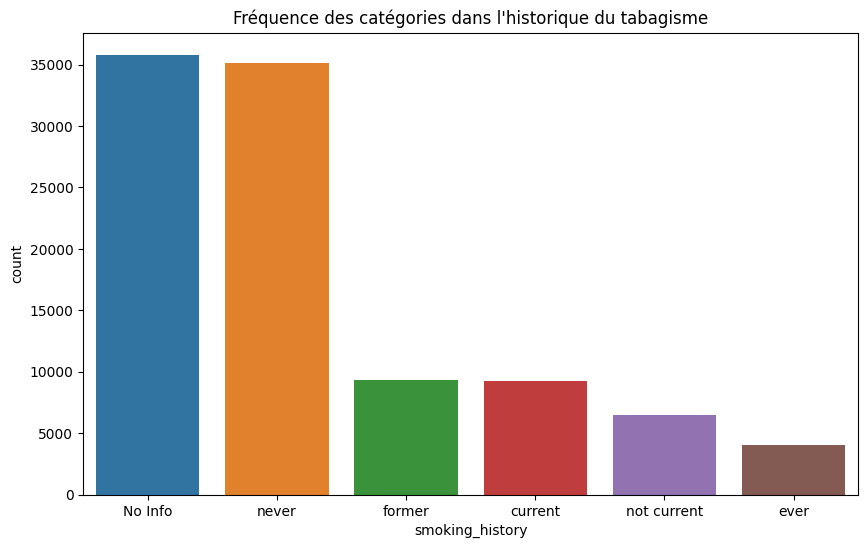

In [ ]:
plt.figure(figsize=(10, 6))
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Breakdown of categories in smoking history')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Distribution de l\'âge parmi les différentes catégories de l\'historique du tabagisme')
plt.show()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64


<Axes: title={'center': 'blood_glucose_level Count'}, xlabel='blood_glucose_level', ylabel='count'>

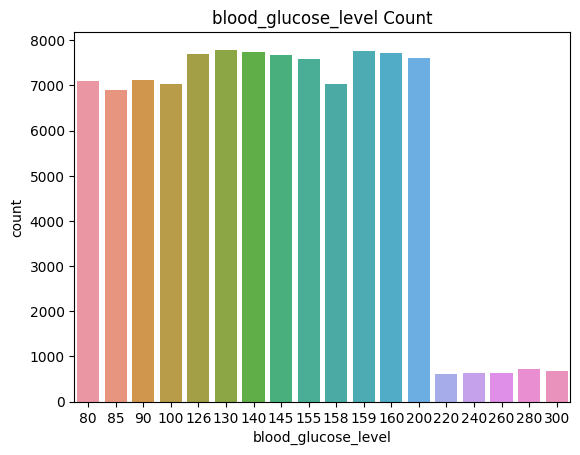

In [ ]:
print(df['blood_glucose_level'].value_counts())

plt.title('blood_glucose_level Count')
sns.countplot(data=df, x='blood_glucose_level')

In [ ]:
# Create a new Boolean variable
df['high_blood_glucose'] = df['blood_glucose_level'] > 220

# Calculate the correlation coefficient
correlation = df['diabetes'].corr(df['high_blood_glucose'])
print('Correlation: ', correlation)


Correlation:  0.5438352428450124


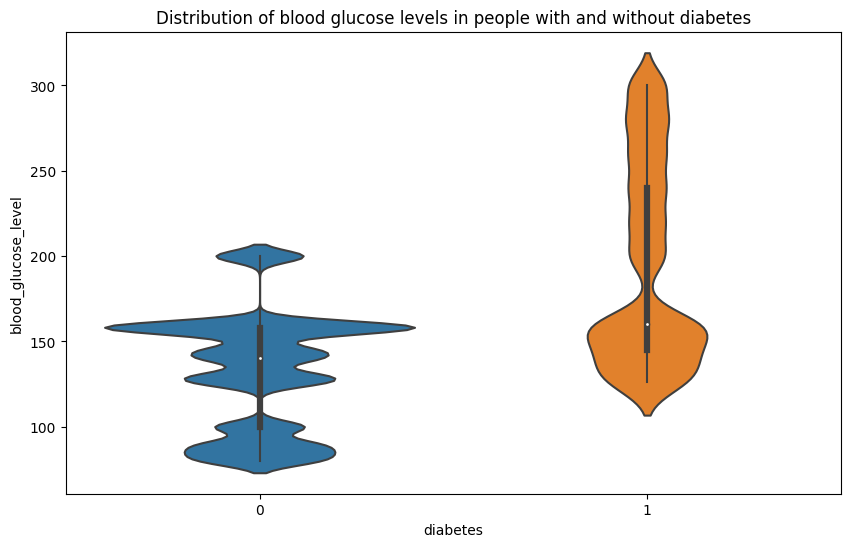

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes')
plt.show()


<ipython-input-32-b1ad590c8ce2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


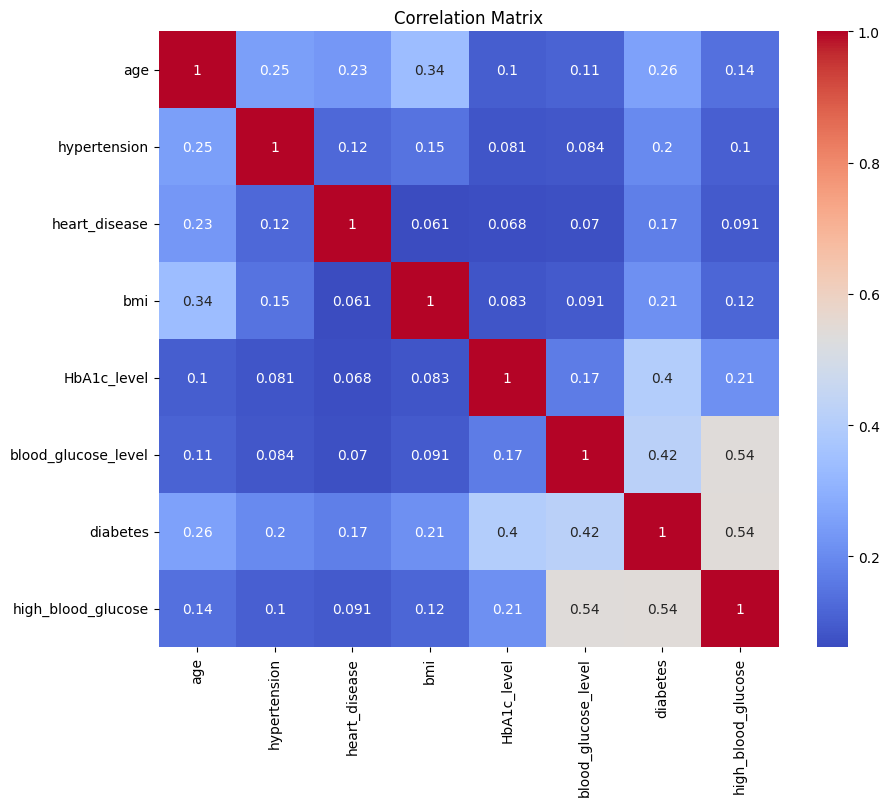

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(df, hue='diabetes')

About pandas-profiling 

pandas-profiling primary goal is to provide a one-line Exploratory Data Analysis (EDA) experience in a consistent and fast solution. Like pandas df.describe() function, that is so handy, pandas-profiling delivers an extended analysis of a DataFrame while alllowing the data analysis to be exported in different formats such as html and json

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

## Machine Learning Part

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)


In [ ]:
# y_pred = model.predict(X_test)

# print(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoke', drop_first=True)

TeaPOT

Tree-based Pipeline Optimization Tool, or TPOT for short, is a Python library for automated machine learning.

TPOT is an open-source library for performing AutoML in Python. It makes use of the popular Scikit-Learn machine learning library for data transforms and machine learning algorithms and uses a Genetic Programming stochastic global search procedure to efficiently discover a top-performing model pipeline for a given datase

TPOT uses a tree-based structure to represent a model pipeline for a predictive modeling problem, including data preparation and modeling algorithms and model hyperparameters.

http://epistasislab.github.io/tpot/using/
